## Reto 4: Las mejores 50

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - Agrupaciones y reducciones
        - Reordenamiento
        - Unión de `DataFrames` usando `merge`
    
---
    
### 2. Desarrollo:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### a) Las 50 películas con mejor rating

Vamos a hacer una visualización muy sencilla de las 50 películas que tienen mejor rating en nuestro dataset. Tu Reto consiste en seguir los siguientes pasos:

1. Lee los archivos `movies` y `ratings`.
2. Agrupa `ratings` por id de película y computa el promedio de `rating` para cada película
3. Crea un nuevo `DataFrame` que sólo contenga las 50 películas con mejor promedio de ratings
4. Agrega al `DataFrame` anterior los nombres de las películas usando la tabla `movies`.
5. Al final tendrás un `DataFrame` con los nombres de las 50 películas con mejor rating ('title') y el promedio de sus ratings ('rating'). Asigna este resultado a la variable `las_mejores_50`.

In [2]:
#importar pands
import pandas as pd

In [9]:
#leemos los archivos movies y ratings
movies = pd.read_csv('/content/drive/MyDrive/BEDU/movies.csv');
ratings = pd.read_csv('/content/drive/MyDrive/BEDU/ratings.csv');


In [4]:
#vemos los 5 primeros de cada df
movies.head()

,movies_id,movie,clasification
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [10]:
# ponemos los indices
movies = movies.set_index('movies_id',drop=True)
ratings = ratings.set_index(['movie_id','user_id'],drop=True)

In [16]:
# ordenamos la lista para ver cuales tienen el mejor rating y limitamos a 50
top50 = ratings.groupby('movie_id')['rating'].agg('mean').sort_values(ascending=False)[:50]

In [18]:
#hacemos merge
top50withmovie = pd.merge(top50, movies,left_index=True, right_index=True)

In [19]:
top50withmovie.head()

,rating,movie,clasification
989,5.0,Schlafes Bruder (Brother of Sleep) (1995),Drama
3881,5.0,Bittersweet Motel (2000),Documentary
1830,5.0,Follow the Bitch (1998),Comedy
3382,5.0,Song of Freedom (1936),Drama
787,5.0,"Gate of Heavenly Peace, The (1995)",Documentary


In [25]:
# seleccionamos que columnas y les cambiamos el nombre
las_mejores_50 = top50withmovie[['movie', 'rating']]
las_mejores_50.columns = ['title','rating']

Pídele a tu experta la función de verificación `plotting_best_50` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado:

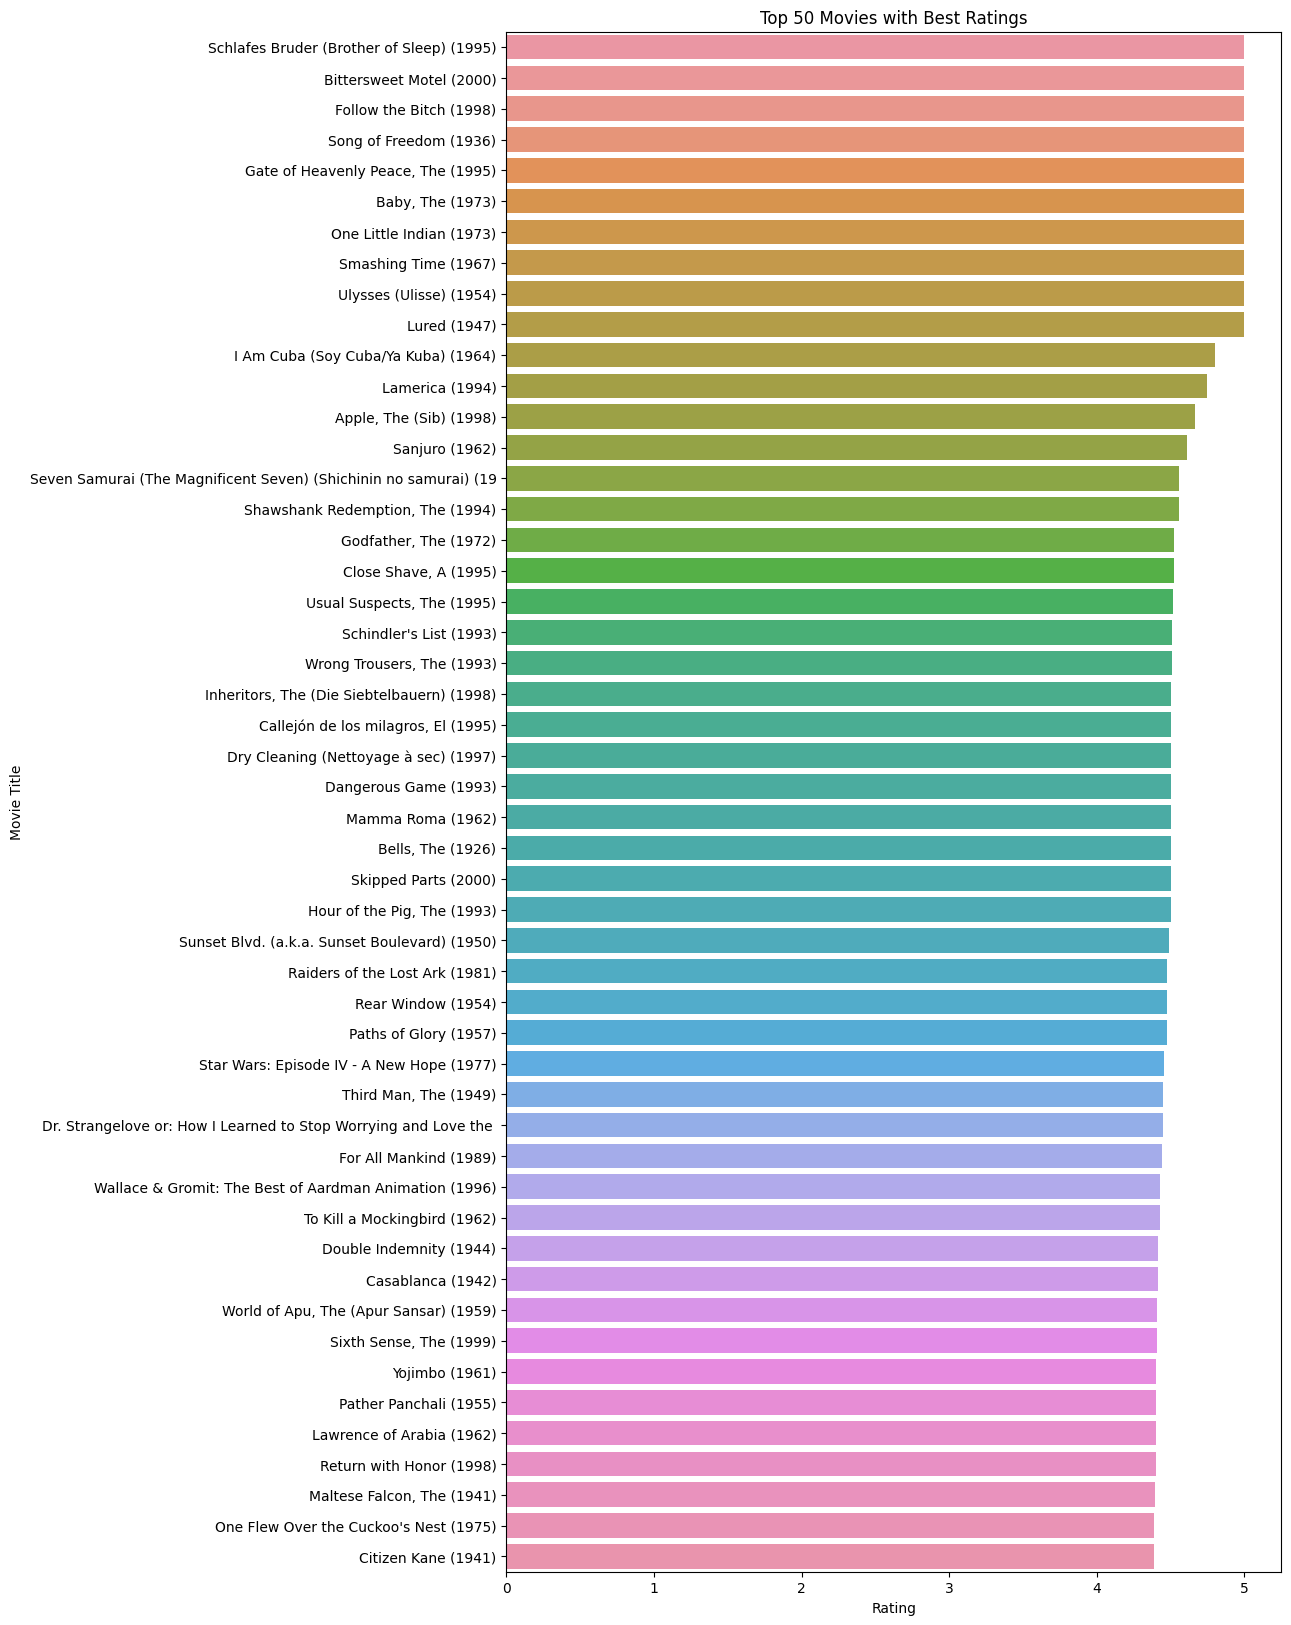

In [30]:
# Pega aquí la función de verificación
def plotting_best_50(las_mejores_50):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 20))
    ax.set_title('Top 50 Movies with Best Ratings')
    splot = sns.barplot(x=las_mejores_50['rating'], y=las_mejores_50['title'], ax=ax)
    ax.set(xlabel='Rating', ylabel='Movie Title')
plotting_best_50(las_mejores_50)

<details><summary>Solución</summary>

```python
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep='$', index_col=0)
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv', index_col=0)
means_of_ratings = ratings.groupby('movie_id')['rating'].mean()
means_of_ratings_top_50 = means_of_ratings.sort_values(ascending=False).head(50)
las_mejores_50 = pd.merge(means_of_ratings_top_50, movies, left_index=True, right_on='movie_id')
```
    
</details>